In [2]:
import torch
import numpy as np
# from einops import rearrange, repeat
# import rosbags
import matplotlib.pyplot as plt
import json
import open3d as o3d
import pandas as pd
import os
import copy
from utility import listFiles, quickVizNumpy
from scipy.spatial.transform import Rotation as R
from numpy import cos, sin, sqrt, arctan2, array
import torch.nn as nn
from einops import rearrange
### fucking around
# from pretrain import loadDataFromRegisteredSlam, cart2sph, preProcess
from train import getSpacing, getTargetCumulativeTransmittance, getTargetTerminationDistribution


In [20]:
t, delta = getSpacing(2, 100)
T = getTargetCumulativeTransmittance(t, variance=0.1)
h = getTargetTerminationDistribution(T, variance=0.1)

TypeError: getTargetTerminationDistribution() got an unexpected keyword argument 'variance'

In [17]:
d = delta[0,:]
f = h[0,:]
f[-1] = 0

y = d * f / 0.1
x = t[0,:] * 0.1

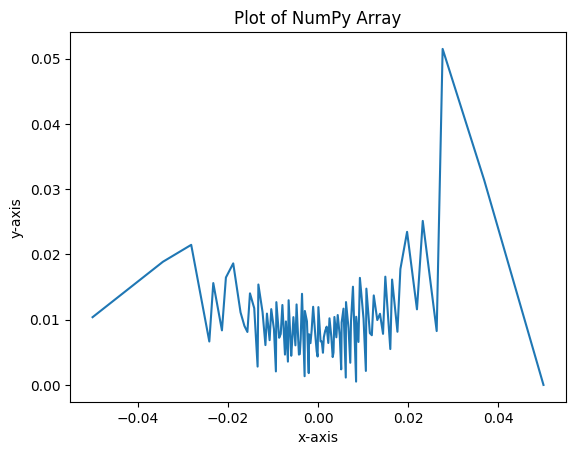

In [18]:
plt.plot(x, y)

# Step 3: Customize the plot (optional)
plt.title("Plot of NumPy Array")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

# Step 4: Show the plot
plt.show()

In [4]:
# name = r'building'
# path = r'datasets/registered/' + name + r'.json'
# data = loadDataFromRegisteredSlam(path)
# training_data = preProcess(data)
# np.random.shuffle(training_data)

Preparing data ... (950/971)

In [79]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



t_np = np.array(t[0,:])
d = np.hstack((t_np[1:] - t_np[:-1], 3.5 ))

b = sigmoid(t_np)
c = (b*(1-b)) * d
print(sum(c))




1.0671611492045856
